In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
import os
from pathlib import Path


### Read data

In [15]:
def read_csv(file_name: str) -> pd.DataFrame :
    """
     summary

    """
    try: 
        dir_folder = Path().cwd().parent
        print(dir_folder)
        file_path = dir_folder / 'data'
        print(file_path)
        df= pd.read_csv(os.path.join(file_path,file_name))
        return df
        
    except FileNotFoundError:
        print(f" Error : The file at {file_name} was not found.")
        raise
    except Exception as e:
        print(f'An error occured: {e}')
        
df = read_csv('bbc-text.csv')

c:\Abdelouaheb\perso\Data_science_2024_projects\2025\DeepLearning_project
c:\Abdelouaheb\perso\Data_science_2024_projects\2025\DeepLearning_project\data


### Data preprocessing

In [16]:
df.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [20]:
df.groupby('category').count()

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


In [ ]:
df['char_count']= df['text'].str.len() # Count number of character in each column


In [24]:
df.head()

,category,text,char_count
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
char_count,2225.0,2262.93618,1364.10253,501.0,1446.0,1965.0,2802.0,25483.0


### WordMap analysis

In [ ]:
#! pip install wordcloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [28]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [55]:
lm= WordNetLemmatizer()

def text_transformation(data: pd.DataFrame) -> list:
        corpus = []
        for item in data:
            new_item = re.sub('[^a-zA-Z]',' ',str(item))
            new_item = new_item.lower()
            new_item = new_item.split()
            new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
            corpus.append(' '.join(str(x) for x in new_item))
        return corpus

def word_cloud_generate(category : str) -> plt:
    df_test= df[df['category']==category][['text']]
    df_test['text']= df_test['text'].astype(str)
    df_test['text']= df_test['text'].str.lower()
    corpus = text_transformation(df_test['text'])
    word_cloud = ''
    for row in corpus :
        for word in row:
            word_cloud += "".join(word)
    wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
    
    return wordcloud

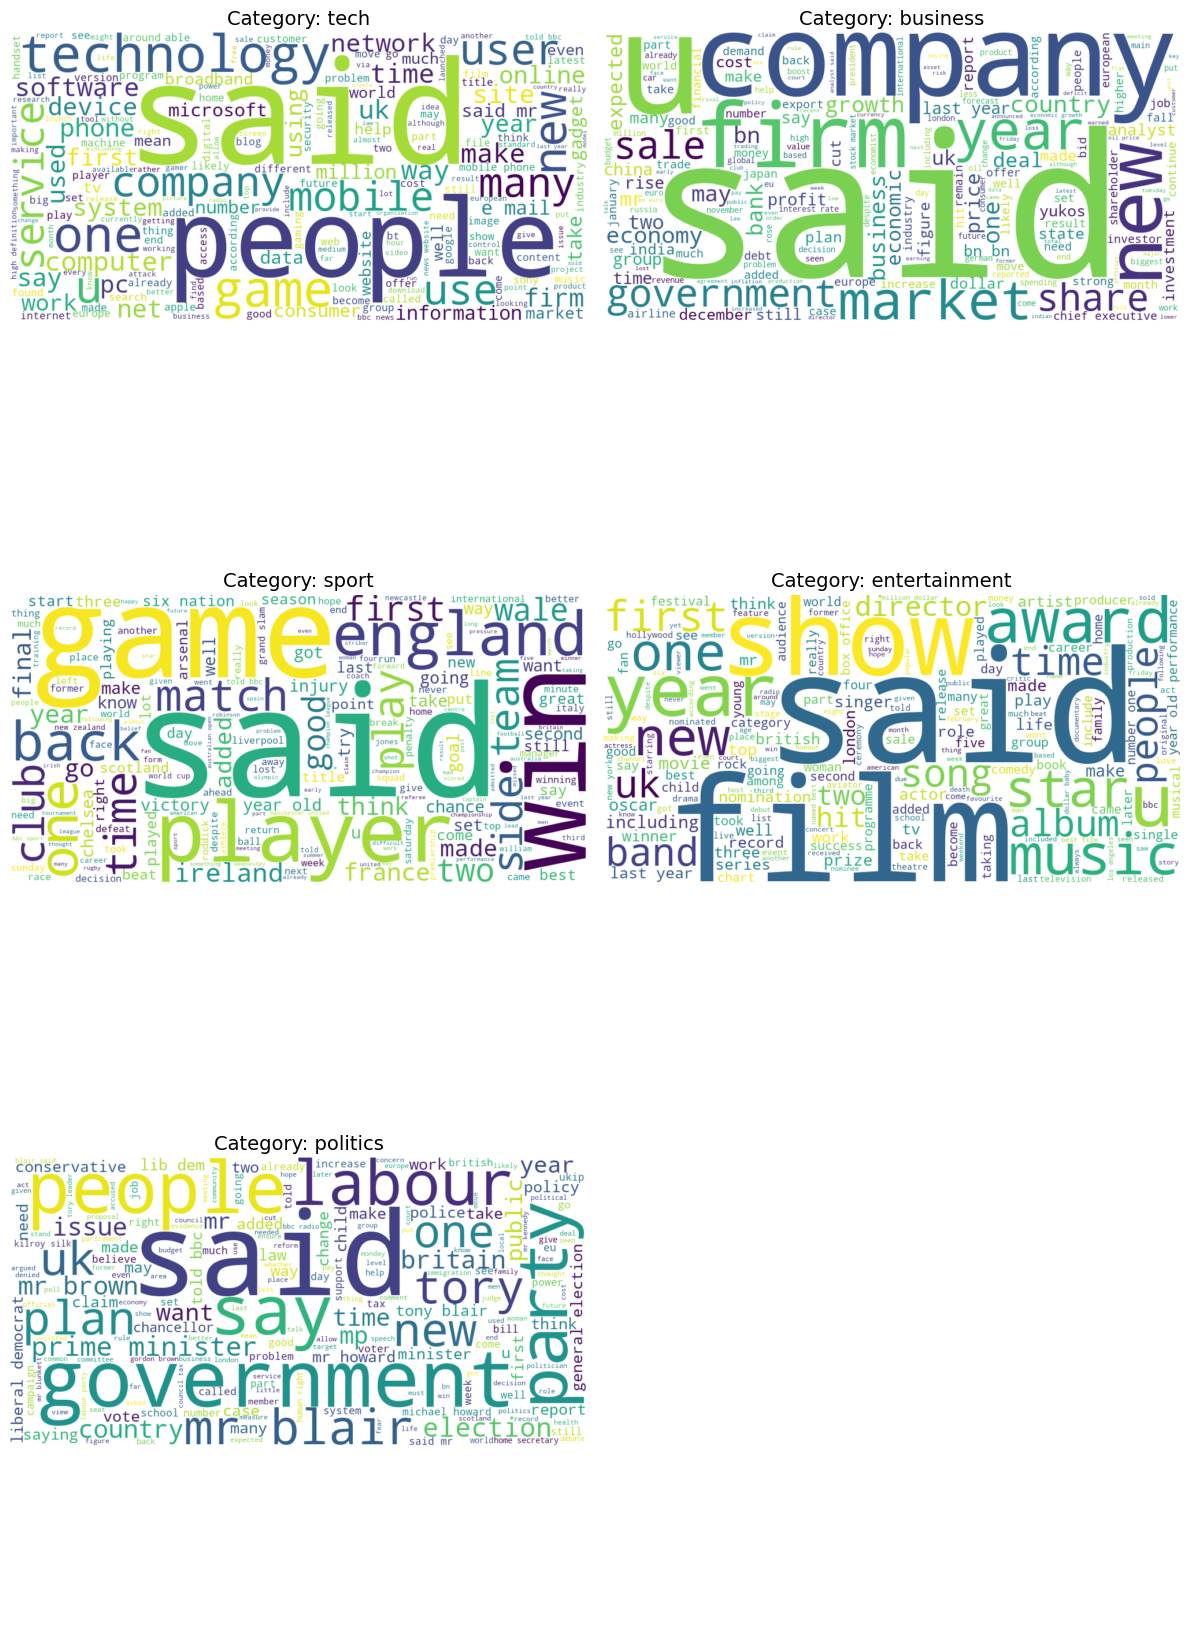

In [59]:
# Get unique categories
categories = df['category'].unique()
n = len(categories)

# Set up subplots grid (auto-adjusted rows/cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
axes = axes.flatten()  # flatten in case of 1D row

for i, cat in enumerate(categories):
    wc = word_cloud_generate(cat)
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f"Category: {cat}", fontsize=14)
    axes[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### RNN 

#### Data structure

In [60]:
vpcap_size = 1000
dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [64]:
stop_words = set(stopwords.words('english'))
sentences = []
labels = []

def df_remove_stopwords(text: str) -> str:
    
    for word in stop_words:
        token= ' '+ word + ' '
        text = text.replace(token,' ')
    return text

labels = df['category'].to_list()
sentences = df['text'].astype(str).apply(df_remove_stopwords).to_list()
    

In [108]:
len(labels)
len(sentences)

2225

In [110]:
labels

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

In [109]:
sentences

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companie

#### Data split

In [111]:
train_size = int(len(labels)*training_portion)
train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]
test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

#### Tokenizer and indexes

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [86]:
sentences_tokenizer =  Tokenizer(num_words = vpcap_size, oov_token=oov_tok)
sentences_tokenizer.fit_on_texts(train_sentences)
word_index= sentences_tokenizer.word_index 

train_sentences_sequences = sentences_tokenizer.texts_to_sequences(train_sentences)
test_sentences_sequences = sentences_tokenizer.texts_to_sequences(test_sentences)


In [102]:
labels_tokenizer =  Tokenizer()
labels_tokenizer.fit_on_texts(train_labels)
word_index= labels_tokenizer.word_index 
train_labels_sequences = np.array(labels_tokenizer.texts_to_sequences(train_labels))
test_labels_sequences = np.array(labels_tokenizer.texts_to_sequences(test_labels))

In [96]:
len(test_labels_sequences)

445

#### Pad_sequences

In [97]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [112]:
train_padded = pad_sequences(train_sentences_sequences, maxlen=max_length, padding=padding_type)
test_padded = pad_sequences(test_sentences_sequences, maxlen=max_length, padding=padding_type)

#### Build The RNN Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vpcap_size, dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [114]:
num_epochs = 50
history = model.fit(train_padded, train_labels_sequences, epochs=num_epochs, validation_data=(test_padded, test_labels_sequences), verbose=2)

Epoch 1/50
56/56 - 1s - 19ms/step - accuracy: 0.2303 - loss: 1.7515 - val_accuracy: 0.2382 - val_loss: 1.6877
Epoch 2/50
56/56 - 0s - 3ms/step - accuracy: 0.2388 - loss: 1.6293 - val_accuracy: 0.3191 - val_loss: 1.5637
Epoch 3/50
56/56 - 0s - 2ms/step - accuracy: 0.4478 - loss: 1.5188 - val_accuracy: 0.6944 - val_loss: 1.4708
Epoch 4/50
56/56 - 0s - 2ms/step - accuracy: 0.6596 - loss: 1.4100 - val_accuracy: 0.6382 - val_loss: 1.3562
Epoch 5/50
56/56 - 0s - 2ms/step - accuracy: 0.7747 - loss: 1.2765 - val_accuracy: 0.7528 - val_loss: 1.2216
Epoch 6/50
56/56 - 0s - 2ms/step - accuracy: 0.8478 - loss: 1.1283 - val_accuracy: 0.7888 - val_loss: 1.0779
Epoch 7/50
56/56 - 0s - 2ms/step - accuracy: 0.8567 - loss: 0.9733 - val_accuracy: 0.8629 - val_loss: 0.9332
Epoch 8/50
56/56 - 0s - 2ms/step - accuracy: 0.8888 - loss: 0.8271 - val_accuracy: 0.8831 - val_loss: 0.8012
Epoch 9/50
56/56 - 0s - 2ms/step - accuracy: 0.9056 - loss: 0.7017 - val_accuracy: 0.8831 - val_loss: 0.7044
Epoch 10/50
56/56 

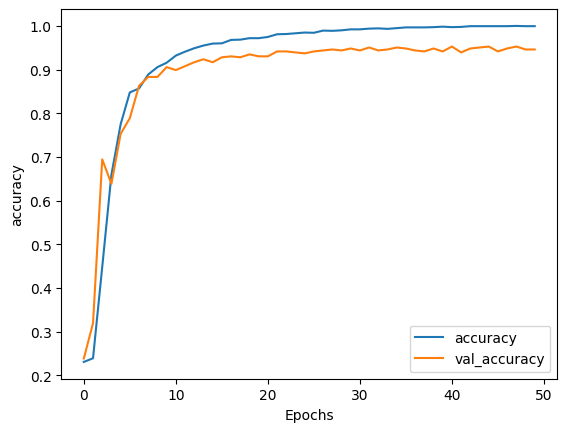

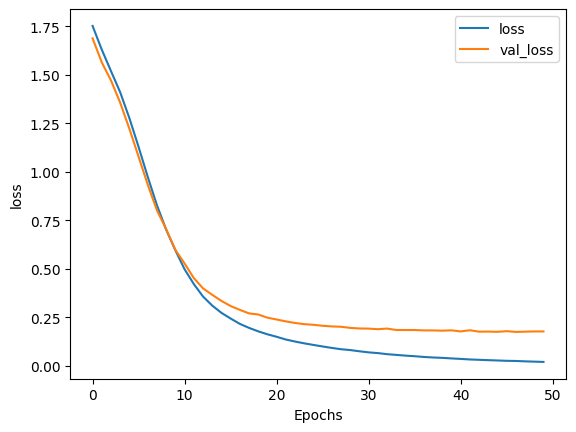

In [115]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [116]:
# Get final evaluation
loss, accuracy = model.evaluate(test_padded, test_labels_sequences, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.1777
Test Accuracy: 0.9461
